### 位运算

二进制数在内存中以补码的形式出现。原码的最高位表示符号，对于正数来说，它的补码和反码跟原码一致（就是规则）。对于负数来说，反码除符号位之外都按位取反，补码是在原码的基础上加个1.

#### 常用操作
~x=-（x+1）

x & (~0<<n)  #对0按位取反后是-1(-0b1)，又向左移动n位（-0b1+n个0）

x & (x-1) 清零最低位的1

x & -x    得最低位的1

bin(x).count('1') #bin：转为二进制

#### 什么是布隆过滤器
布隆过滤器用于查找某个元素是否在已构造好的数据库中。它由哈希函数和一串二进制数组组成，对于某个元素，会有k个哈希函数，通过这k个哈希函数，会映射到二进制数组上的k个位置，将该位置置为1.那么每当对一个元素进行查看，就将其通过k个哈希函数进行计算出k个二进制数组的位置，查看对应的k个位置是否为1，如果有一个或多个不为1，则该元素肯定不存在，如果都为1，那么只是可能存在。它的优点是快速并且存储空间小，缺点是有误判存在。
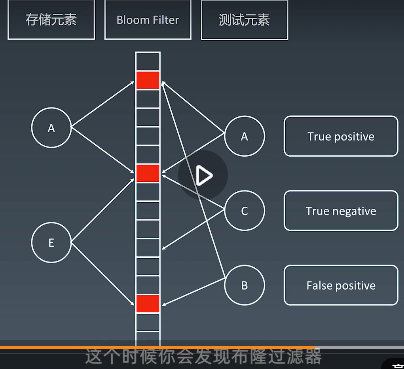
#### 为什么需要布隆过滤器
因为哈希表不仅是查找某个元素是否在内存或数据库中，它还会存储许多关于这个元素的其他信息，比如查找一个id是否在数据库中，数据库里不仅包含id而且还包含它的姓名、电话及地址等。但有时候我们并不需要其他额外元素，我只想知道这个元素是否有存。那么这时候布隆过滤器就派上用场。

#### 使用场景
布隆过滤器主要用于外部判别，对于一批数据，先把肯定不存在的过滤的，对于剩下来可能存在的，再会进入内部判别中。
常用场景有比特币网络、分布式系统、redis缓存、垃圾邮件、评论等的过滤。

LRU缓存了解一个实现即可，实现用语言自带的数据结构就可以，不过有些面试公司可能会想考察基础，所以还是把双端链表和哈希表敲一下

### 排序算法

#### Q：初级排序与高级排序之间区别何在

#### A：引入了分冶的思想，时间复杂度从N2缩减到NlogN


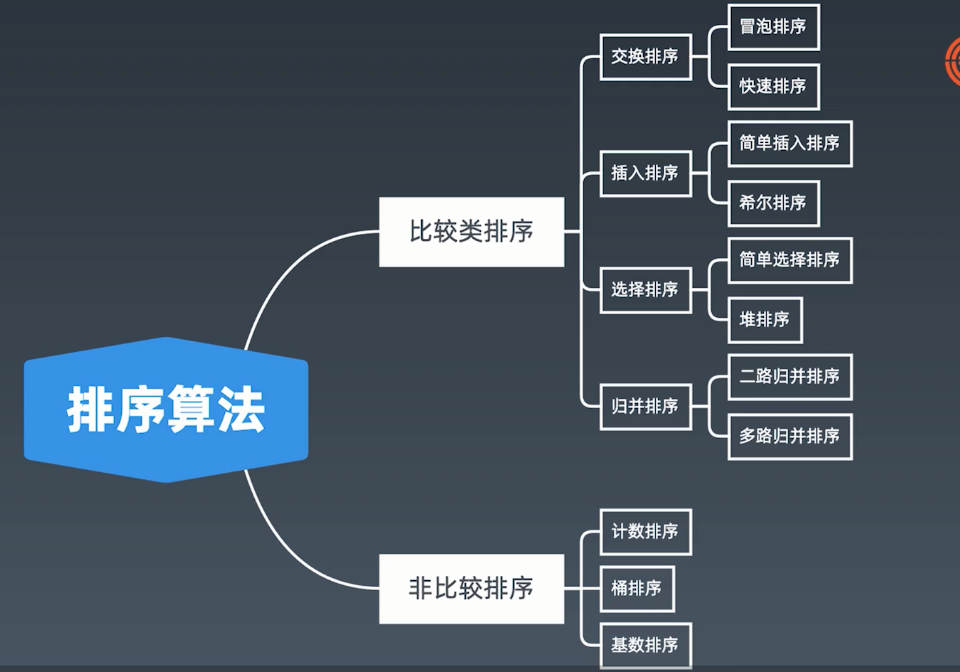

#### 简单排序算法

转自https://realpython.com/sorting-algorithms-python/#the-timsort-algorithm-in-python

In [ ]:
## 冒泡排序

def bublle_sort(array):
    length = len(array)
    
    for i in range(length):
        already_sorted = True
        
        for j in range(n - i - 1):
            if array[j] > array[j + 1]:
                array[j], array[j + 1] = array[j + 1], array[j]
                already_sorted = False
        if already_sorted:
            break
    return array

In [ ]:
#插入排序
def insertion_sort(array):
    for i in range(1, len(array)):
        key_item = array[i]
        j = i - 1
        while j >= 0 and array[j] > key_item:
            array[j + 1] = array[j]
            j -= 1
        array[j + 1] = key_item
    return array

In [ ]:
#归并排序
def merge(left, right):
    if len(left) == 0:
        return right
    if len(right) == 0:
        return left
    result = []
    index_left = index_right = 0
    while len(result) < len(left) + len(right):
        if left[index_left] <= right[index_right]:
            result.append(left[index_left])
            index_left += 1
        else:
            result.append(right[index_right])
            index_right += 1

        if index_right == len(right):
            result += left[index_left:]
            break

        if index_left == len(left):
            result += right[index_right:]
            break

    return result

def merge_sort(array):
    if len(array) < 2:
        return array

    midpoint = len(array) // 2
    return merge(
        left=merge_sort(array[:midpoint]),
        right=merge_sort(array[midpoint:]))

In [ ]:
##快速排序
from random import randint

def quicksort(array):
    if len(array) < 2:
        return array

    low, same, high = [], [], []

    pivot = array[randint(0, len(array) - 1)]

    for item in array:
        if item < pivot:
            low.append(item)
        elif item == pivot:
            same.append(item)
        elif item > pivot:
            high.append(item)
    return quicksort(low) + same + quicksort(high)